In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Programming Exercise 1: Linear Regression

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recom- mend watching the video lectures and completing the review questions for the associated topics.
To get started with the exercise, you will need to download the starter code and unzip its contents to the directory where you wish to complete the exercise. If needed, use the cd command in Octave/MATLAB to change to this directory before starting this exercise.
You can also find instructions for installing Octave/MATLAB in the “En- vironment Setup Instructions” of the course website.

## Linear Regression with One Variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

In [2]:
filename = "data/ex1data1.txt"
data = np.loadtxt(filename, delimiter = ",", usecols=(0,1), unpack = True)
# Define X and y arrays
Xtr = np.asarray(data[:-1])[0]
ytr = np.asarray(data[-1:])[0]

In [3]:
# Define weights
W = tf.Variable(0.0)

# Define bias
b = tf.Variable(tf.zeros([1]))

# Define cost function
y = W*Xtr + b

In [4]:
alpha = 0.0055
loss = tf.reduce_mean(tf.square(y-ytr))
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

init = tf.initialize_all_variables()

In [5]:
sess = tf.Session()
sess.run(init)

epochs = 2000
for _ in range(epochs):
    sess.run(optimizer)
print("Theta:", sess.run(W), sess.run(b))
print("The profits in area of 35,000 people: $%.2f" %(((sess.run(b) * 1) + (sess.run(W) * 3.5))*10000))
print("The profits in area of 70,000 people: $%.2f" %(((sess.run(b) * 1) + (sess.run(W) * 7))*10000))

Theta: 1.18549 [-3.82072234]
The profits in area of 35,000 people: $3285.04
The profits in area of 70,000 people: $44777.30


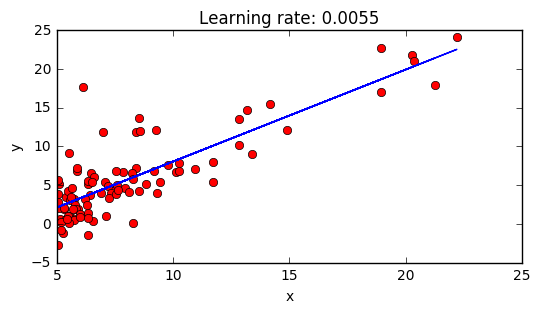

In [6]:
plt.figure(figsize=(6,3))
plt.title('Learning rate: %s' %(alpha))
plt.plot(Xtr, ytr, 'ro')
plt.plot(Xtr, sess.run(W)*Xtr + sess.run(b))
plt.xlabel('x')
plt.ylabel('y')
plt.show()